In [ ]:
#pip install arcgis==1.8.4

In [ ]:
#pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import  Sequential
from keras import models, layers
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.layers.core.activation import Activation
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_hub as hub
import PIL.Image as Image

In [ ]:
  classifyImage = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape=(224,224,3))
])

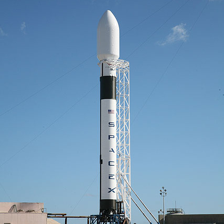

In [ ]:
  image = Image.open('/content/sample_data/Falcon9_1.jpg').resize((224,224))
  image

In [ ]:
image =  np.array(image)
image

array([[[ 67, 108, 152],
        [ 67, 108, 152],
        [ 67, 108, 152],
        ...,
        [ 88, 126, 165],
        [ 84, 124, 165],
        [ 82, 123, 166]],

       [[ 66, 107, 153],
        [ 66, 107, 153],
        [ 66, 107, 153],
        ...,
        [ 82, 123, 163],
        [ 82, 121, 162],
        [ 83, 121, 163]],

       [[ 67, 108, 154],
        [ 67, 108, 154],
        [ 67, 108, 154],
        ...,
        [ 81, 123, 163],
        [ 80, 123, 163],
        [ 80, 124, 163]],

       ...,

       [[186, 168, 159],
        [186, 169, 159],
        [185, 169, 158],
        ...,
        [ 46,  48,  47],
        [ 40,  45,  44],
        [ 39,  45,  43]],

       [[186, 168, 157],
        [187, 170, 159],
        [185, 168, 158],
        ...,
        [ 33,  41,  40],
        [ 33,  39,  38],
        [ 35,  40,  38]],

       [[189, 171, 156],
        [186, 168, 155],
        [185, 168, 159],
        ...,
        [ 25,  36,  36],
        [ 27,  33,  33],
        [ 29,  32,  33]]

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
image = image / 255
image
#Normalised Image

array([[[0.2627451 , 0.42352941, 0.59607843],
        [0.2627451 , 0.42352941, 0.59607843],
        [0.2627451 , 0.42352941, 0.59607843],
        ...,
        [0.34509804, 0.49411765, 0.64705882],
        [0.32941176, 0.48627451, 0.64705882],
        [0.32156863, 0.48235294, 0.65098039]],

       [[0.25882353, 0.41960784, 0.6       ],
        [0.25882353, 0.41960784, 0.6       ],
        [0.25882353, 0.41960784, 0.6       ],
        ...,
        [0.32156863, 0.48235294, 0.63921569],
        [0.32156863, 0.4745098 , 0.63529412],
        [0.3254902 , 0.4745098 , 0.63921569]],

       [[0.2627451 , 0.42352941, 0.60392157],
        [0.2627451 , 0.42352941, 0.60392157],
        [0.2627451 , 0.42352941, 0.60392157],
        ...,
        [0.31764706, 0.48235294, 0.63921569],
        [0.31372549, 0.48235294, 0.63921569],
        [0.31372549, 0.48627451, 0.63921569]],

       ...,

       [[0.72941176, 0.65882353, 0.62352941],
        [0.72941176, 0.6627451 , 0.62352941],
        [0.7254902 , 0

In [ ]:
image[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
classifyImage.predict(image[np.newaxis,...])

array([[ 0.22717223,  0.06404608, -0.07991119, ..., -0.5489298 ,
        -0.05152136, -0.33651674]], dtype=float32)

In [ ]:
# THE PRETRAINED MODEL GAVE THE OUTPUT AS BELOW FOR ROCKET IMAGE
# MEANIGN OUT OF 1000 CLASSES FROM THE PRETRAINED MODEL IT GAVE PROBABILITY VALUES OF THE IMAGE BELONGING TO A PARTICULAR CLASS
# CLASS 0 = 0.22717223, CLASS 1 = 0.06404608, CLASS 2 = -0.07991119
# array([[ 0.22717223,  0.06404608, -0.07991119, ..., -0.5489298 ,
        -0.05152136, -0.33651674]], dtype=float32)

In [ ]:
modelResult = classifyImage.predict(image[np.newaxis,...])
modelResult.shape

(1, 1001)

In [ ]:
#get the max result, meaning which class has the max value which can categorise the IMAGE GIVEN as INPUT
resultCategoryIndex_INClass =  np.argmax(modelResult)
resultCategoryIndex_INClass
# THE VALUE IS THE INDEX IN THE CLASS CATEGORY

658

In [ ]:
listLabel = []
with open("/content/sample_data/ImageNetLabels.txt","r") as f:
  listLabel = f.read().splitlines()

In [ ]:
listLabel[resultCategoryIndex_INClass]

'missile'